In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
%cd '/content/drive/MyDrive/2024_환경부/data'

/content/drive/MyDrive/2024_환경부/data


## 국립공원공단 - 국립공원 로드킬 정보

In [101]:
import pandas as pd
# national park roadkill
np_rk = pd.read_csv('국립공원공단_국립공원 로드킬 정보_20231220.csv', encoding='cp949')

In [102]:
np_rk.head()

,국립공원명,조사일자,자원명,경도,위도
0,한려해상,2021-10-20,멧새,128.674692,34.752264
1,한려해상,2021-10-13,청설모,128.674692,34.752264
2,한려해상,2021-10-11,청설모,128.674692,34.752264
3,한려해상,2021-09-02,능구렁이,128.674692,34.752264
4,한려해상,2021-07-27,고라니,128.674692,34.752264


In [103]:
np_rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국립공원명   3183 non-null   object 
 1   조사일자    3183 non-null   object 
 2   자원명     3183 non-null   object 
 3   경도      3183 non-null   float64
 4   위도      3183 non-null   float64
dtypes: float64(2), object(3)
memory usage: 124.5+ KB


In [104]:
np_rk.isna().sum() # 결측치는 없음

국립공원명    0
조사일자     0
자원명      0
경도       0
위도       0
dtype: int64

In [105]:
np_rk['국립공원명'].unique()

array(['한려해상', '태안해안', '태백산', '치악산', '내장산', '월출산', '오대산', '경주', '속리산',
       '주왕산', '지리산', '다도해해상', '변산반도', '월악산', '덕유산', '설악산', '소백산', '계룡산',
       '무등산', '가야산'], dtype=object)

In [106]:
np_rk['조사일자'].unique() # 시계열 데이터 분석 가능

array(['2021-10-20', '2021-10-13', '2021-10-11', ..., '2012-09-12',
       '2012-02-27', '2011-09-09'], dtype=object)

In [107]:
np_rk['자원명'].unique()

array(['멧새', '청설모', '능구렁이', '고라니', '까치', '족제비', '다람쥐', '동박새', '곤줄박이',
       '참새', '직박구리', '두더지', '큰부리까마귀', '대륙유혈목이', '오소리', '멧비둘기', '너구리', '꿩',
       '쇠살모사', '흰넓적다리붉은쥐', '무자치', '딱새', '참개구리', '까치살모사', '들꿩', '누룩뱀',
       '유혈목이', '멧토끼', '북방산개구리', '무당개구리', '살모사', '집쥐', '고슴도치', '두꺼비',
       '호랑지빠귀', '소쩍새', '청딱다구리', '멧돼지', '어치', '큰산개구리', '되지빠귀', '노루',
       '물두꺼비', '되솔새', '노랑할미새', '대륙밭쥐', '물까치', '붉은머리오목눈이', '고양이', '계곡산개구리',
       '쏙독새', '개똥지빠귀', '맹꽁이', '오색딱다구리', '멧밭쥐', '흰배지빠귀', '옴개구리', '굴뚝새',
       '까마귀', '노랑턱멧새', '유리딱새', '파랑새', '생쥐', '큰유리새', '큰소쩍새', '호반새', '쇠박새',
       '쑥새', '한국꼬리치레도롱뇽', '알락할미새', '쇠딱다구리', '박새', '뻐꾸기', '메추라기', '등줄쥐',
       '붉은귀거북', '오목눈이', '황조롱이', '한국산개구리', '숲새', '왜가리', '찌르레기', '원앙',
       '우수리땃쥐', '바다직박구리', '제비', '방울새', '땃쥐', '동고비', '때까치', '양진이', '칡때까치',
       '쇠유리새', '도마뱀', '물까마귀', '쇠솔딱새', '아무르장지뱀', '쇠부엉이'], dtype=object)

In [109]:
# 조사 일자 datetime으로 변경
df_np = np_rk.copy()
df_np['조사일자'] = pd.to_datetime(df_np['조사일자'])
df_np.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   국립공원명   3183 non-null   object        
 1   조사일자    3183 non-null   datetime64[ns]
 2   자원명     3183 non-null   object        
 3   경도      3183 non-null   float64       
 4   위도      3183 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 124.5+ KB


### 조사일자

In [113]:
df_np['Year'] = df_np['조사일자'].dt.year
year = df_np.groupby(['Year']).size()
year

Year
2011    416
2012    390
2013    262
2014    281
2015    210
2016    284
2017    279
2018    203
2019    307
2020    132
2021    178
2022    130
2023    111
dtype: int64

In [114]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.5 MB/s eta 0:00:00


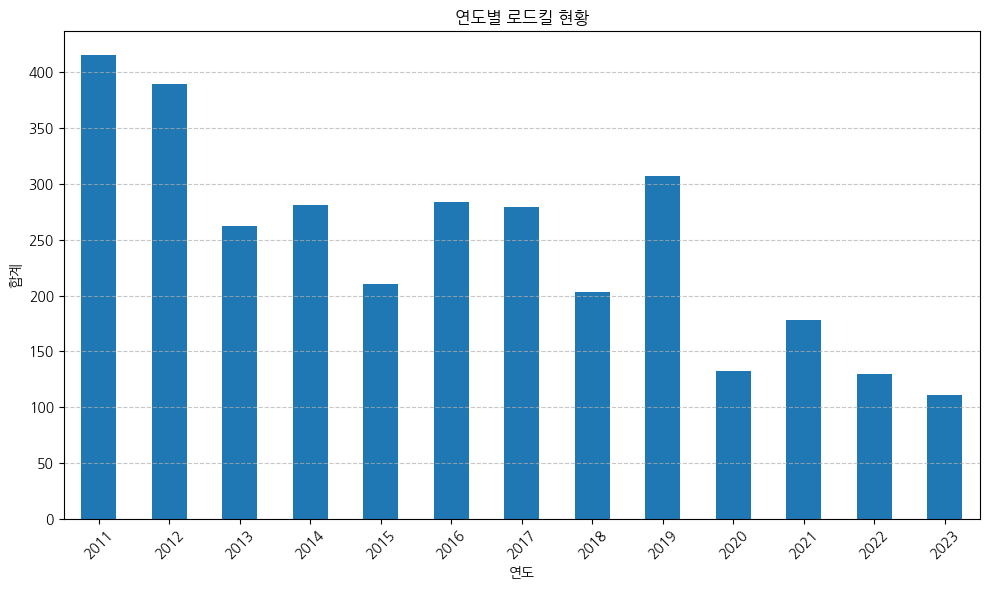

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

year.plot(kind='bar', figsize=(10, 6))
plt.title('연도별 로드킬 현황')
plt.xlabel('연도')
plt.ylabel('합계')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_np['Month'] = df_np['조사일자'].dt.month
month = df_np.groupby(['Year', 'Month']).size()
month

Year  Month
2011  1         2
      2         3
      3        10
      4        39
      5        43
               ..
2023  7        12
      8        23
      9        14
      10       11
      11        4
Length: 151, dtype: int64

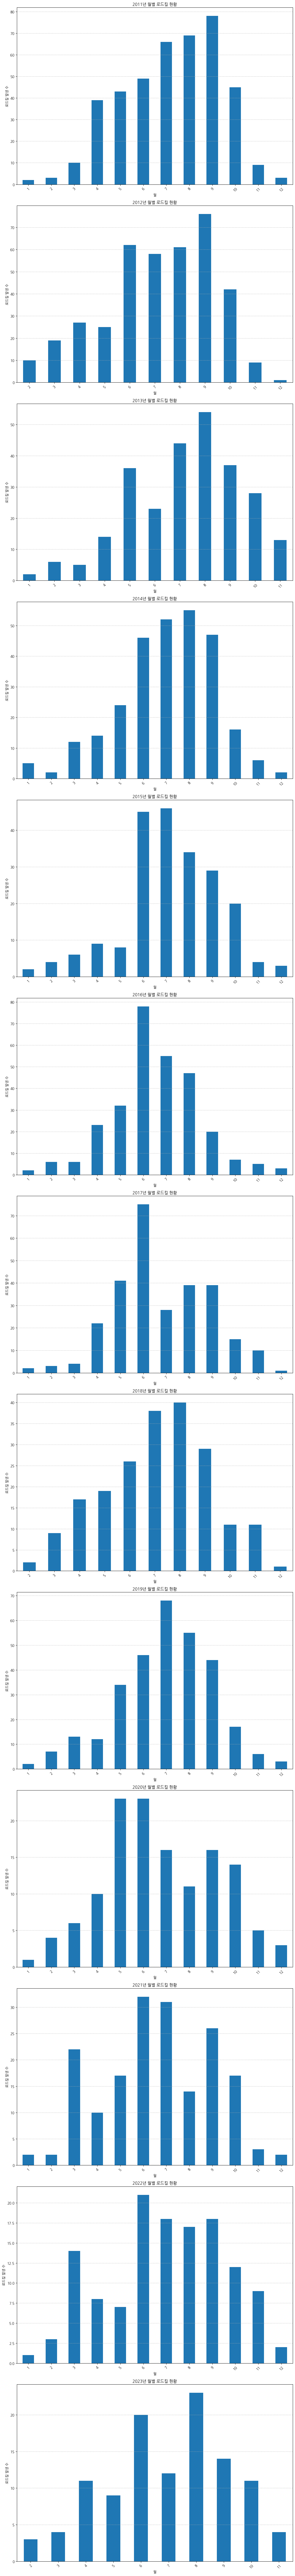

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

unique_years = month.index.get_level_values('Year').unique()

fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(12, 8*len(unique_years)))

for i, year in enumerate(unique_years):
    ax = axes[i]
    data = month.loc[year]
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'{year}년 월별 로드킬 현황')
    ax.set_xlabel('월')
    ax.set_ylabel('로드킬 발생 수')
    ax.set_xticklabels(data.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 국립공원

In [116]:
df_np['국립공원명'].unique()

array(['한려해상', '태안해안', '태백산', '치악산', '내장산', '월출산', '오대산', '경주', '속리산',
       '주왕산', '지리산', '다도해해상', '변산반도', '월악산', '덕유산', '설악산', '소백산', '계룡산',
       '무등산', '가야산'], dtype=object)

In [ ]:
park = df_np.groupby(['Year', '국립공원명']).size().reset_index(name='Count')
park = park.sort_values(by=['Year', 'Count'], ascending=[False, False])
park

,Year,국립공원명,Count
204,2023,지리산,35
201,2023,오대산,24
200,2023,속리산,14
198,2023,설악산,13
195,2023,내장산,8
...,...,...,...
10,2011,월악산,6
13,2011,치악산,6
11,2011,주왕산,5
0,2011,가야산,3


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

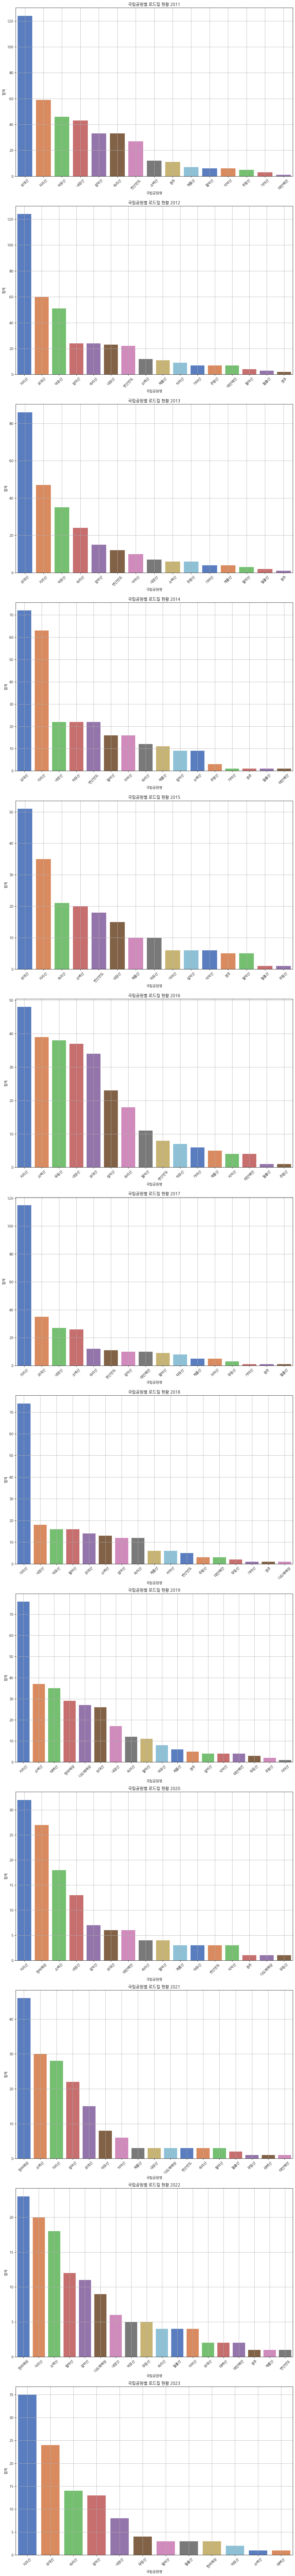

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, axes = plt.subplots(nrows=park['Year'].nunique(), ncols=1, figsize=(12, 8*park['Year'].nunique())) # Adjusted height
for i, (year, data) in enumerate(park.groupby('Year')):
    ax = axes[i]
    sns.barplot(data=data, x='국립공원명', y='Count', palette='muted', ax=ax)  # Pass sorted DataFrame 'data' instead of 'park'
    ax.set_title(f'국립공원별 로드킬 현황 {year}')
    ax.set_xlabel('국립공원명')
    ax.set_ylabel('합계')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

### 자원명

In [ ]:
resource_counts = df_np.groupby(['Year', '자원명']).size().reset_index(name='Count')
resource_counts

,Year,자원명,Count
0,2011,계곡산개구리,4
1,2011,고라니,21
2,2011,고양이,13
3,2011,까치,2
4,2011,까치살모사,2
...,...,...,...
484,2023,청설모,9
485,2023,큰산개구리,2
486,2023,큰유리새,1
487,2023,한국산개구리,1


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [ ]:
top10 = (
    resource_counts.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

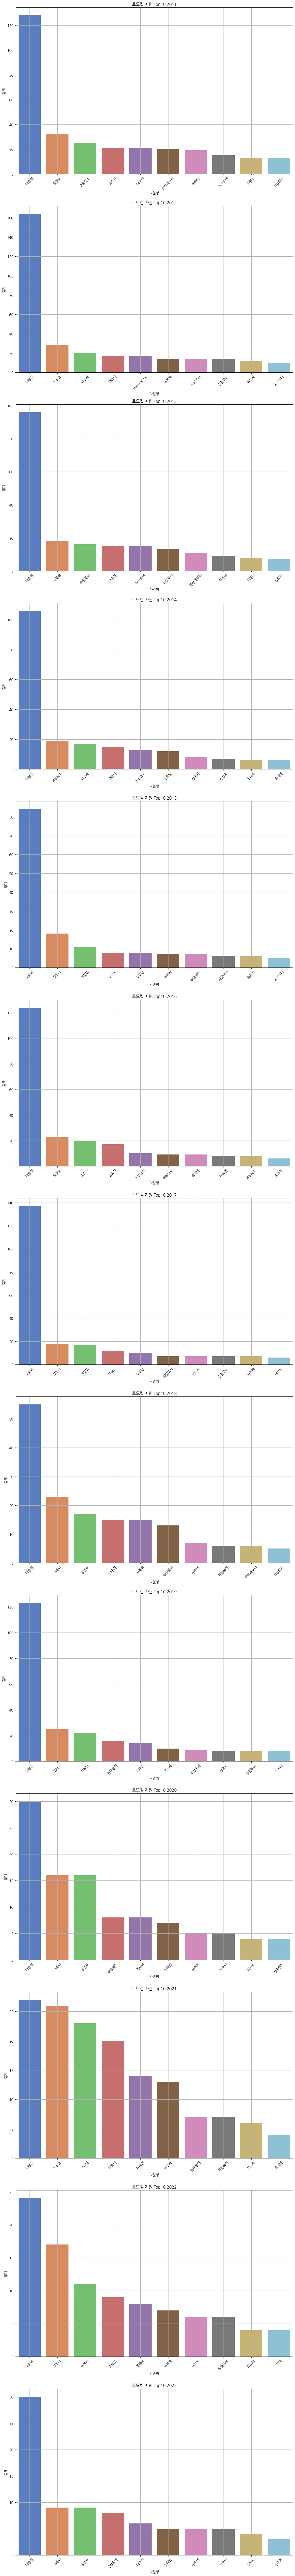

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, axes = plt.subplots(nrows=top10['Year'].nunique(), ncols=1, figsize=(12, 8*top10['Year'].nunique())) # Adjusted height
for i, (year, data) in enumerate(top10.groupby('Year')):
    ax = axes[i]
    sns.barplot(data=data, x='자원명', y='Count', palette='muted', ax=ax)
    ax.set_title(f'로드킬 자원 Top10 {year}')
    ax.set_xlabel('자원명')
    ax.set_ylabel('합계')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

### 위경도

In [ ]:
df.head()

,국립공원명,조사일자,자원명,경도,위도,Year,Month
0,한려해상,2021-10-20,멧새,128.674692,34.752264,2021,10
1,한려해상,2021-10-13,청설모,128.674692,34.752264,2021,10
2,한려해상,2021-10-11,청설모,128.674692,34.752264,2021,10
3,한려해상,2021-09-02,능구렁이,128.674692,34.752264,2021,9
4,한려해상,2021-07-27,고라니,128.674692,34.752264,2021,7


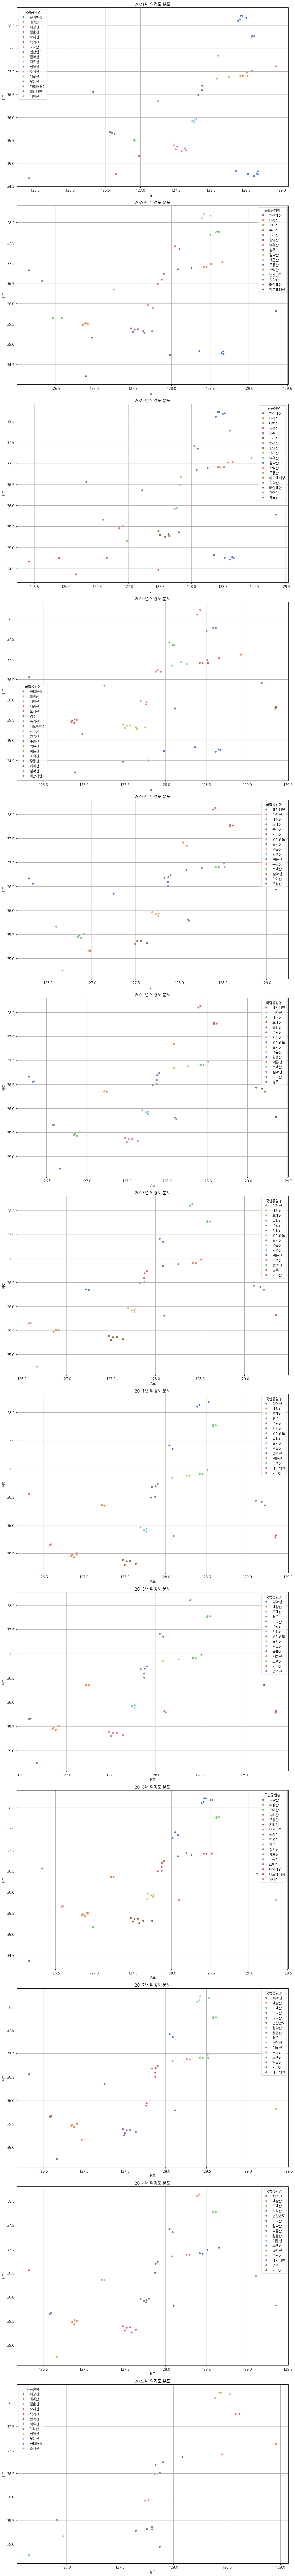

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data

# Get unique years
unique_years = df['Year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(12, 8*len(unique_years)))

# Iterate over each year and plot the data
for i, year in enumerate(unique_years):
    ax = axes[i]
    data_year = df[df['Year'] == year]
    sns.scatterplot(data=data_year, x='경도', y='위도', hue='국립공원명', palette='muted', ax=ax)
    ax.set_title(f'{year}년 위경도 분포')
    ax.set_xlabel('경도')
    ax.set_ylabel('위도')
    ax.grid(True)

plt.tight_layout()
plt.show()

## 국립생태원 - 로드킬 신고 현황

In [117]:
import pandas as pd
# national institute of ecologt roadkill
ne_rk = pd.read_csv('국립생태원_로드킬 정보시스템 로드킬 신고 현황_20201231.csv')

In [118]:
ne_rk.head()

,종명,접수일시,도로유형,도로명
0,고양이,2020-01-01,국도,29
1,고라니,2020-01-01,국도,일반국도39호선
2,고라니,2020-01-02,국도,일반국도32호선
3,고라니,2020-01-02,국도,17
4,어치,2020-01-02,국도,5


In [119]:
ne_rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15107 entries, 0 to 15106
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종명      15107 non-null  object
 1   접수일시    15107 non-null  object
 2   도로유형    15107 non-null  object
 3   도로명     14300 non-null  object
dtypes: object(4)
memory usage: 472.2+ KB


In [120]:
ne_rk.isna().sum()

종명        0
접수일시      0
도로유형      0
도로명     807
dtype: int64

In [121]:
ne_rk['종명'].unique()

array(['고양이', '고라니', '어치', '멧돼지', '너구리', '닭', '개', '족제비', '매', '들꿩',
       '까마귀', '삵', '두더지', '오소리', '다람쥐', '토끼', '청설모', '흰배지빠귀', '사슴', '오리',
       '미동정', '원앙', '두루미', '수달', '파랑새', '참새', '부엉이', '곤줄박이', '시궁쥐',
       '미동정(조류)', '동박새', '꿩', '독수리', '노루', '미동정(포유류)', '새', '황소개구리',
       '청둥오리', '털발말똥가리', '수리부엉이', '멧비둘기', '멧토끼', '말똥가리', '집비둘기', '올빼미',
       '긴점박이올빼미', '붉은배새매', '황조롱이', '담비', '염소', '두꺼비', '검은등제비갈매기', '까치',
       '흰뺨검둥오리', '붉은왜가리', '집오리', '갈매기', '유혈목이', '큰부리까마귀', '직박구리',
       '바다직박구리', '가창오리', '개꿩', '중백로', '구렁이', '쇠백로', '참매', '미동정(파충류)',
       '누룩뱀', '붉은해오라기', '검둥오리', '고슴도치', '호반새', '쏙독새', '쇠살모사', '새매',
       '메추라기', '살모사', '자라', '긴꼬리때까치', '검은등뻐꾸기', '노랑부리백로', '슴새', '왜가리',
       '뻐꾸기', '검은댕기해오라기', '종다리', '큰뒷부리도요', '능구렁이', '물닭'], dtype=object)

In [122]:
ne_rk['도로유형'].unique()

array(['국도', '지방도 ', '시도', '지방도', '군도', '고속국도(재정)', '고속국도(민자)'],
      dtype=object)

## 한국도로공사 - 로드킬 데이터 정보

In [51]:
import pandas as pd
# korean expressway corporation roadkill
ke_rk_2019 = pd.read_csv('로드킬데이터_사고잦은구간(2019년상반기).csv', encoding='cp949')

In [52]:
ke_rk_2019.drop(columns=['사고율', '반기'], inplace=True)

In [53]:
ke_rk_2019.columns = [['본부명', '지사명', '노선명', '구간', '방향', '5km', '발생건수', '위도', '경도']]

In [54]:
ke_rk_2019.head()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,수도권,경기광주,제2중부선,330~335,하남,330.0,4.0,37.283,127.386
1,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.249,127.421
2,수도권,경기광주,중부선,330~335,통영,330.0,10.0,37.283,127.385
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315,127.347
4,수도권,경기광주,중부선,340~345,통영,340.0,4.0,37.354,127.321


In [55]:
import pandas as pd
# korean expressway corporation roadkill
ke_rk_2020 = pd.read_csv('한국도로공사_로드킬 데이터 정보_20200630_수정.csv', encoding='cp949')

In [56]:
ke_rk_2020.drop(columns=['사고율', '반기', '노선코드'], inplace=True)

In [57]:
ke_rk_2020.columns = [['본부명', '지사명', '노선명', '구간', '방향', '5km', '발생건수', '위도', '경도']]

In [58]:
ke_rk_2020.head()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,강원,이천,영동선,55~60,서창,55,5,37.247752,127.235399
1,강원,이천,영동선,60~65,강릉,60,14,37.239032,127.289142
2,강원,이천,영동선,60~65,서창,60,7,37.239032,127.289142
3,강원,이천,영동선,65~70,강릉,65,6,37.251889,127.341751
4,강원,이천,영동선,70~75,서창,70,3,37.239983,127.392494


In [59]:
import pandas as pd
# korean expressway corporation roadkill
ke_rk_2021 = pd.read_csv('한국도로공사_로드킬 데이터 정보_20220630.csv', encoding='cp949')

In [60]:
ke_rk_2021.columns = [['본부명', '지사명', '노선명', '구간', '방향', '5km', '발생건수', '위도', '경도']]

In [61]:
ke_rk_2021.head()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,강원,홍천,중앙선,315~320,부산,315,13,37.340987,127.912591
1,강원,홍천,중앙선,315~320,춘천,315,7,37.340987,127.912591
2,강원,홍천,중앙선,385~390,춘천,385,6,37.838769,127.777996
3,강원,강릉,동해선,65~70,속초,65,4,37.802916,128.823887
4,강원,대관령,영동선,230~235,인천,230,4,37.754931,128.796506


In [62]:
ke_rk_2021['본부명'].value_counts()

(본부명,)
충북        30
대전충남      28
강원        20
광주전남      15
전북        12
수도권        9
부산경남       3
대구경북       2
Name: count, dtype: int64

In [63]:
ke_rk_2021['지사명'].value_counts()

(지사명,)
진천        16
홍천         9
대전         8
함평         7
공주         6
제천         6
엄정         6
원주         5
남원         4
논산         4
당진         4
천안         4
영동         4
시흥         4
경기광주       3
순천         3
강릉         3
대관령        3
부여         2
부안         2
보은         2
영주         2
보령         2
진안         2
서울산        1
전주         1
무주         1
진주         1
동서울        1
창원         1
담양         1
수원         1
Name: count, dtype: int64

In [89]:
df = pd.concat([ke_rk_2019, ke_rk_2020, ke_rk_2021], ignore_index=True)
df['Year'] = pd.Series([2019]*len(ke_rk_2019) + [2020]*len(ke_rk_2020) + [2021]*len(ke_rk_2021))

In [90]:
df.head()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
0,수도권,경기광주,제2중부선,330~335,하남,330.0,4.0,37.283,127.386,2019
1,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.249,127.421,2019
2,수도권,경기광주,중부선,330~335,통영,330.0,10.0,37.283,127.385,2019
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315,127.347,2019
4,수도권,경기광주,중부선,340~345,통영,340.0,4.0,37.354,127.321,2019


In [91]:
df.tail()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
440,충북,진천,중부선,315~320,통영,315.0,3.0,37.163088,127.440035,2021
441,충북,진천,중부선,320~325,통영,320.0,3.0,37.207765,127.442214,2021
442,충북,진천,중부선,255~260,통영,255.0,3.0,36.666547,127.424086,2021
443,충북,진천,중부선,265~270,통영,265.0,3.0,36.745619,127.469129,2021
444,충북,진천,중부선,270~275,하남,270.0,3.0,36.778273,127.506681,2021


In [92]:
df.dropna(inplace=True)

In [93]:
df.isna().sum()

본부명     0
지사명     0
노선명     0
구간      0
방향      0
5km     0
발생건수    0
위도      0
경도      0
Year    0
dtype: int64

In [71]:
df.head()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
0,수도권,경기광주,제2중부선,330~335,하남,330.0,4.0,37.283,127.386,2019
1,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.249,127.421,2019
2,수도권,경기광주,중부선,330~335,통영,330.0,10.0,37.283,127.385,2019
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315,127.347,2019
4,수도권,경기광주,중부선,340~345,통영,340.0,4.0,37.354,127.321,2019


In [72]:
df.to_csv('도로공사 로드킬 (2019-2021).csv', index=False)

In [94]:
df2 = np_rk.copy()
df2['조사일자'] = pd.to_datetime(df2['조사일자'])
df2['Year'] = df2['조사일자'].dt.year

count_df = df2.groupby(['위도', '경도', 'Year']).size().reset_index(name='Count')
count_df

,위도,경도,Year,Count
0,34.202500,126.894125,2019,21
1,34.202500,126.894125,2020,1
2,34.364500,126.161131,2018,1
3,34.364500,126.161131,2022,3
4,34.467922,127.476324,2019,5
...,...,...,...,...
556,38.217000,128.425986,2019,2
557,38.217000,128.425986,2020,1
558,38.217000,128.425986,2021,5
559,38.217000,128.425986,2022,4


진천 중부

## 국립생태원 - 전국생태통로 정보

In [ ]:
import pandas as pd
# national institute of ecologt wildflife corridor
np_wc = pd.read_csv('Mapservice2024-05-15.csv', encoding='cp949')

In [ ]:
np_wc.head()

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도,위도_분,위도_초,경도_도,경도_분,경도_초,관리기관,생태통로유형,설치기관,설치년도
0,1001,중동터널,서울특별시 구로구 궁동,NaN,NaN,왕복6차로,37,30,23.37,126,49,51.56,서울특별시 구로구,육교형,서울특별시,2001
1,1002,개좌생태터널,부산광역시 금정구 회동동 산4-1,NaN,0,왕복2차선,35,15,6.05,129,8,27.31,부산광역시 금정구,육교형,부산광역시,2009
2,1004,곰내 생태통로,부산광역시 기장군 철마면 웅천리,NaN,19호선,왕복2차선,35,18,20.8,129,10,19.2,부산광역시 기장군,육교형,부산광역시,2007
3,1005,정관예림리 생태통로,부산광역시 기장군 정관면 예림리,NaN,60호,왕복4차선,35,19,46.80,129,12,11.90,부산광역시 기장군,터널형,부산광역시,2007
4,1006,을숙도 생태통로,부산광역시 사하구 하단동,NaN,1240,왕복7차선,35,6,31.8463200000076,128,56,28.469039999984,부산광역시 낙동강관리본부,육교형,부산광역시 낙동강관리본부,201211


In [ ]:
np_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      540 non-null    int64  
 1   생태통로명   412 non-null    object 
 2   주소      540 non-null    object 
 3   도로명     0 non-null      float64
 4   도로번호    520 non-null    object 
 5   차선_수    540 non-null    object 
 6   위도_도    540 non-null    object 
 7   위도_분    540 non-null    object 
 8   위도_초    540 non-null    object 
 9   경도_도    540 non-null    object 
 10  경도_분    540 non-null    object 
 11  경도_초    540 non-null    object 
 12  관리기관    540 non-null    object 
 13  생태통로유형  540 non-null    object 
 14  설치기관    540 non-null    object 
 15  설치년도    538 non-null    object 
dtypes: float64(1), int64(1), object(14)
memory usage: 67.6+ KB


In [ ]:
np_wc.isna().sum()

번호          0
생태통로명     128
주소          0
도로명       540
도로번호       20
차선_수        0
위도_도        0
위도_분        0
위도_초        0
경도_도        0
경도_분        0
경도_초        0
관리기관        0
생태통로유형      0
설치기관        0
설치년도        2
dtype: int64

In [ ]:
np_wc['차선_수'].value_counts()

차선_수
왕복4차선                243
왕복2차선                219
왕복6차선                 34
왕복8차선                 11
왕복3차선                  8
왕복1차선                  3
왕복5차선                  3
왕복6차로                  2
왕복왕복4차선차선              2
왕복6~8차선                2
왕복6∼8차선                2
하천횡단                   1
왕복16차선                 1
1차로                    1
왕복 6 차선                1
왕복 1 차선                1
왕복3차선(오르막차로1차로포함)      1
왕복7차선                  1
왕복5                    1
2차선                    1
왕복12차선                 1
하부 왕복 6차선              1
Name: count, dtype: int64

In [ ]:
df = np_wc.copy()

In [ ]:
result_string = np_wc['관리기관'].value_counts()
result_string

관리기관
한국도로공사          95
전라북도 도로관리사업소    19
영주국토관리사무소       16
홍천국토관리사무소       15
충청북도 청주시        15
                ..
경상북도 군위군         1
경상남도 의령군         1
경상남도 도로관리사업소     1
환경부 원주지방환경청      1
경상북도 김천시         1
Name: count, Length: 114, dtype: int64

In [ ]:
import pandas as pd

# Sample DataFrame
df = np_wc.copy()

# Add '시' column containing only the hour information from the address
df['시'] = df['주소'].str.extract(r'(\S+)시')

# Preprocess latitude and longitude columns to remove non-numeric characters
df['위도_도'] = df['위도_도'].str.extract('(\d+)').astype(float)
df['위도_분'] = df['위도_분'].str.extract('(\d+)').astype(float)  # Extract numeric values
df['위도_초'] = df['위도_초'].str.extract('(\d+)').astype(float)  # Extract numeric values
df['경도_도'] = df['경도_도'].str.extract('(\d+)').astype(float)
df['경도_분'] = df['경도_분'].str.extract('(\d+)').astype(float)  # Extract numeric values
df['경도_초'] = df['경도_초'].str.extract('(\d+)').astype(float)  # Extract numeric values

# Convert latitude and longitude from degrees, minutes, and seconds to decimal format
df['위도'] = df['위도_도'] + df['위도_분'] / 60 + df['위도_초'] / 3600
df['경도'] = df['경도_도'] + df['경도_분'] / 60 + df['경도_초'] / 3600

# Keep only the first four digits of the '설치년도' column
df['연도'] = df['설치년도'].astype(str).str.extract(r'(\d{4})')

# Drop unnecessary columns
df.drop(columns=['도로명', '도로번호', '위도_도', '위도_분', '위도_초', '경도_도', '경도_분', '경도_초'], inplace=True)

df.head()

,번호,생태통로명,주소,차선_수,관리기관,생태통로유형,설치기관,설치년도,시,위도,경도,연도
0,1001,중동터널,서울특별시 구로구 궁동,왕복6차로,서울특별시 구로구,육교형,서울특별시,2001,서울특별,37.506389,126.830833,2001
1,1002,개좌생태터널,부산광역시 금정구 회동동 산4-1,왕복2차선,부산광역시 금정구,육교형,부산광역시,2009,부산광역,35.251667,129.140833,2009
2,1004,곰내 생태통로,부산광역시 기장군 철마면 웅천리,왕복2차선,부산광역시 기장군,육교형,부산광역시,2007,부산광역,35.305556,129.171944,2007
3,1005,정관예림리 생태통로,부산광역시 기장군 정관면 예림리,왕복4차선,부산광역시 기장군,터널형,부산광역시,2007,부산광역,35.329444,129.203056,2007
4,1006,을숙도 생태통로,부산광역시 사하구 하단동,왕복7차선,부산광역시 낙동강관리본부,육교형,부산광역시 낙동강관리본부,201211,부산광역,35.108611,128.941111,2012


In [ ]:
mapping = {
    '왕복4차선': 4,
    '왕복2차선': 2,
    '왕복6차선': 6,
    '왕복8차선': 8,
    '왕복3차선': 3,
    '왕복1차선': 1,
    '왕복5차선': 5,
    '왕복6차로': 6,
    '왕복왕복4차선차선': 4,
    '왕복6~8차선': 7,
    '왕복6∼8차선': 7,
    '하천횡단': 1,
    '왕복16차선': 16,
    '1차로': 1,
    '왕복 6 차선': 6,
    '왕복 1 차선': 1,
    '왕복3차선(오르막차로1차로포함)': 3,
    '왕복7차선': 7,
    '왕복5': 5,
    '2차선': 2,
    '왕복12차선': 12,
    '하부 왕복 6차선': 6

}
df['차선_수'] = df['차선_수'].replace(mapping)
df.head()

,번호,생태통로명,주소,차선_수,관리기관,생태통로유형,설치기관,설치년도,시,위도,경도,연도
0,1001,중동터널,서울특별시 구로구 궁동,6,서울특별시 구로구,육교형,서울특별시,2001,서울특별,37.506389,126.830833,2001
1,1002,개좌생태터널,부산광역시 금정구 회동동 산4-1,2,부산광역시 금정구,육교형,부산광역시,2009,부산광역,35.251667,129.140833,2009
2,1004,곰내 생태통로,부산광역시 기장군 철마면 웅천리,2,부산광역시 기장군,육교형,부산광역시,2007,부산광역,35.305556,129.171944,2007
3,1005,정관예림리 생태통로,부산광역시 기장군 정관면 예림리,4,부산광역시 기장군,터널형,부산광역시,2007,부산광역,35.329444,129.203056,2007
4,1006,을숙도 생태통로,부산광역시 사하구 하단동,7,부산광역시 낙동강관리본부,육교형,부산광역시 낙동강관리본부,201211,부산광역,35.108611,128.941111,2012


In [ ]:
df.isna().sum()

번호          0
생태통로명     128
주소          0
차선_수        0
관리기관        0
생태통로유형      0
설치기관        0
설치년도        2
시         262
위도          1
경도          1
연도          2
dtype: int64

In [ ]:
df.to_csv('전국생태통로.csv', index=False)

## 국립공원공단 - 국립공원 생물자원 현황

In [ ]:
import pandas as pd
# national park biological resources
np_br = pd.read_csv('국립공원_생물자원현황_2022.csv', encoding='cp949')

In [ ]:
np_br.head()

,국립공원,생물분류,종명,학명,분류명,경도,위도,조사일자,개체수
0,가야산,곤충류,Ameletus costalis,costalis,피라미하루살이,128.07811,35.81122,2022-05-21,0
1,가야산,곤충류,Anotogaster sieboldii,sieboldii,장수잠자리,128.07811,35.81122,2022-05-21,0
2,가야산,곤충류,Cinygmula grandifolia,grandifolia,봄처녀하루살이,128.07811,35.81122,2022-05-21,0
3,가야산,곤충류,Cinygmula grandifolia,grandifolia,봄처녀하루살이,128.07959,35.81062,2022-05-22,7
4,가야산,곤충류,Davidius lunatus,lunatus,쇠측범잠자리,128.07811,35.81122,2022-05-21,0
